# Tokenizzazione & WordNet (NLTK)

NLTK (libreria Python completa per l'NLP e l'analisi del testo).


Tokenizzazione: metodo per suddividere un testo in più parti, come frasi e parole, ed è un primo passo essenziale per i progetti di NLP.

Consiste nel suddividere una stringa in un elenco di pezzi o token. 

Un token è un pezzo di un insieme, quindi una parola è un token in una frase e una frase è un token in un paragrafo. 


**WordNet** è un dizionario progettato per l'accesso programmatico da parte dei sistemi di elaborazione del linguaggio naturale. 

Ha molti casi d'uso diversi, tra cui: 
 - Trovare sinonimi e contrari di una parola;
 - Esplorare le relazioni e le somiglianze tra le parole;
 - Cercare la definizione di una parola;
 - Disambiguazione del senso della parola per parole che hanno usi e definizioni multiple;


NLTK include un lettore di corpus **WordNet**, che verrà usato per accedere ed esplorare WordNet. 

*Corpus:* insieme di testi, e i lettori di corpus sono progettati per rendere l'accesso a un corpus molto più semplice rispetto all'accesso diretto alle fle.

#NLTK (tokenization) 

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# we can start by creating a paragraph of text:
para = "Good afternoon, everyone. I am the NLP professor today! This lecture is interesting?"

from nltk.tokenize import sent_tokenize
sent_tokenize(para)

['Good afternoon, everyone.',
 'I am the NLP professor today!',
 'This lecture is interesting?']

La funzione **sent_tokenize** utilizza un'istanza di **PunktSentenceTokenizer** dal modulo *nltk.tokenize.punkt*.

Questa istanza è già stata addestrata e funziona bene per molte lingue europee, quindi sa quindi quali sono i caratteri di punteggiatura che segnano la fine di una frase e l'inizio di una nuova frase.

**Tokenizzazione di frasi in altre lingue**
Se si desidera tokenizzare frasi in lingue diverse dall'inglese, si può caricare uno degli altri pickle in tokenizers/punkt/PY3 e usarlo proprio come il tokenizzatore di frasi in inglese. 

In [3]:
ita_tokenizer = nltk.data.load('tokenizers/punkt/italian.pickle')
ita_tokenizer.tokenize('Che giornataccia. Ho molto sonno!')


['Che giornataccia.', 'Ho molto sonno!']

**Tokenizzazione delle frasi in parole**
Si può fare un ulteriore divisione, ad esempio quella di una frase in singole parole. 

In [4]:
from nltk.tokenize import word_tokenize
word_tokenize('Good afternoon,, everyone.!')

['Good', 'afternoon', ',', ',', 'everyone', '.', '!']

La funzione **word_tokenize()** è una funzione wrapper che chiama **tokenize()** su un'istanza della classe *TreebankWordTokenizer*. 

Funziona separando le parole con spazi e punteggiatura. Come si può vedere, non scarta la punteggiatura, lasciando all'utente la possibilità di decidere cosa farne. 

In [5]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize('Good afternoon,, everyone.!')

['Good', 'afternoon', ',', ',', 'everyone.', '!']

Un altro tokenizzatore di parole alternativo è **WordPunctTokenizer**.

Divide tutta la punteggiatura in token separati:

In [6]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
tokenizer.tokenize('Good afternoon,, everyone.!')

['Good', 'afternoon', ',,', 'everyone', '.!']

**Tokenizzare le frasi usando le espressioni regolari**
Le espressioni regolari possono essere utilizzate se si vuole avere un controllo completo su come tokenizzare il testo. Poiché le espressioni regolari possono diventare complicate molto rapidamente, ne raccomando l'uso solo se i tokenizzatori di parole trattati nella ricetta precedente non sono accettabili.


In [7]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")
tokenizer.tokenize('Good afternoon,, everyone.!')

['Good', 'afternoon', 'everyone']

In [8]:
tokenizer.tokenize("Today isn't good day!")

['Today', "isn't", 'good', 'day']

In [9]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")
tokenizer.tokenize("Today isn't good day!")

['Today', "isn't", 'good', 'day']

**Filtrare le stopword in una frase tokenizzata**
Le **stopword** sono parole comuni che generalmente non contribuiscono al significato di una frase, almeno ai fini del reperimento delle informazioni e dell'NLP. 
Infatti la maggior parte dei motori di ricerca elimina le stopword dalle query di ricerca e dai documenti per risparmiare spazio nel loro indice.


In NLTK viene fornito con un corpus di stopwords che contiene elenchi di parole per molte lingue. 

In [10]:
nltk.download('stopwords')

from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))
words = ['Good', 'afternoon', 'for', 'everyone']
[word for word in words if word not in english_stops]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['Good', 'afternoon', 'everyone']

In [11]:
from nltk.corpus import stopwords
english_stops = set(stopwords.words('italian'))
words = ['Che', 'giornata', 'piovosa', 'è', 'rilassante']
[word for word in words if word not in english_stops]

['Che', 'giornata', 'piovosa', 'rilassante']

Il corpus **stopwords** è un'istanza di *nltk.corpus.reader.WordListCorpusReader*. 

Il metodo *words()* può accettare un singolo argomento per l'ID del fle, che in questo caso è 'italian', riferendosi a un fle contenente un elenco di stopwords italiane.

#WordNet 

**WordNet** https://wordnet.princeton.edu/

è un database lessicale per la lingua inglese. 
In altre parole, è un dizionario progettato specificamente per l'NLP. 

NLTK è dotato di una semplice interfaccia per cercare le parole in WordNet. 

Si ottiene un elenco di istanze di *Synset*, che sono raggruppamenti di parole sinonime che esprimono lo stesso concetto. 

Molte parole hanno un solo *Synset*, ma alcune ne hanno diversi. 

*NB* Per ora esploreremo un singolo *Synset*


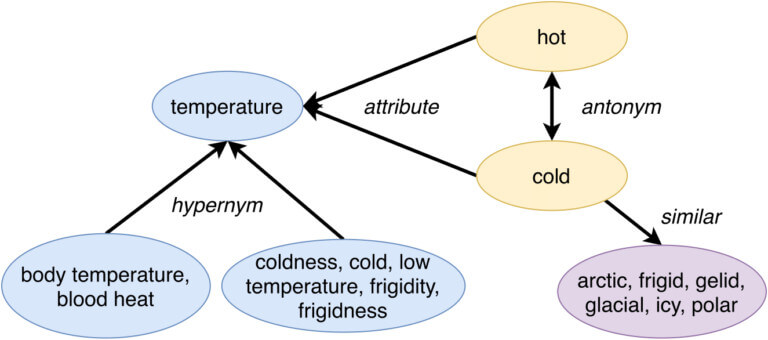

In [12]:
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import wordnet
syn = wordnet.synsets('cocaine')[0]
syn.name()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


'cocaine.n.01'

In [13]:
syn.definition()

'a narcotic (alkaloid) extracted from coca leaves; used as a surface anesthetic or taken for pleasure; can become powerfully addictive'

È possibile cercare qualsiasi parola in WordNet utilizzando **wordnet.synset (word)** per ottenere un elenco di sinonimi. 

L'elenco può essere vuoto se la parola non viene trovata. 

L'elenco può anche avere molti elementi, poiché alcune parole possono avere molti significati possibilivquindi molti insiemi.

**lemmi e sinonimi**

Possiamo anche cercare i lemmi per trovare i sinonimi di una parola. 

(*lemma:* forma canonica o morfologica di una parola).

In [14]:
from nltk.corpus import wordnet
syn = wordnet.synsets('cookbook')[0]
lemmas = syn.lemmas()
len(lemmas)

2

In [15]:
lemmas[0].name()

'cookbook'

In [16]:
lemmas[1].name()

'cookery_book'

In [17]:
lemmas[0].synset() == lemmas[1].synset()

True

Come si può vedere, cookery_book e cookbook sono due lemmi distinti nello stesso Synset.

Infatti, un lemma può appartenere a un solo Synset.

**In questo modo, un Synset rappresenta un gruppo di lemmi che hanno tutti lo stesso significato, mentre un lemma rappresenta una forma di parola distinta.**


Poiché tutti i lemmi di un Synset hanno lo stesso significato, possono essere trattati come sinonimi. 

Quindi, se si vogliono ottenere tutti i sinonimi di un Synset, si può procedere come segue:

In [18]:
[lemma.name() for lemma in syn.lemmas()]

['cookbook', 'cookery_book']

In [33]:
[str(lemma.name()) for lemma in wordnet.synset('dog.n.01').lemmas()]

['dog', 'domestic_dog', 'Canis_familiaris']

In [19]:
synonyms = []
for syn in wordnet.synsets('book'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
len(synonyms)

38

Come si può vedere, sembrano esserci 38 possibili sinonimi per la parola **"book"**. 

In realtà, alcuni sinonimi sono forme verbali e molti sinonimi sono solo usi diversi di "libro". Se invece prendiamo l'insieme dei sinonimi, le parole uniche sono meno numerose, come mostra il codice seguente:

In [20]:
len(set(synonyms))

25

Alcuni lemmi hanno anche degli **antonimi**. 

La parola **"good"**, per esempio, ha 27 sintagmi, cinque dei quali hanno lemmi con antonimi, come mostrato nel codice seguente:

In [21]:
gn2 = wordnet.synset('good.n.02')
gn2.definition()

'moral excellence or admirableness'

In [22]:
evil = gn2.lemmas()[0].antonyms()[0]
evil.name

<bound method Lemma.name of Lemma('evil.n.03.evil')>

In [23]:
evil.synset().definition()

'the quality of being morally wrong in principle or practice'

In [24]:
ga1 = wordnet.synset('good.a.01')
ga1.definition()

'having desirable or positive qualities especially those suitable for a thing specified'

In [25]:
bad = ga1.lemmas()[0].antonyms()[0]
bad.name()

'bad'

In [26]:
bad.synset().definition()

'having undesirable or negative qualities'

Il metodo *antonyms()* restituisce un elenco di lemmi. 

Nel primo caso, come si può vedere nel codice precedente, il secondo sintagma di **"good"** come sostantivo è definito come eccellenza morale e il suo primo antonimo è evil, definito come moralmente sbagliato. 

Nel secondo caso, quando good è usato come aggettivo per descrivere qualità positive, il primo antonimo è bad, che descrive qualità negative.

**Somiglianza tra i sinonimi di WordNet**

I sinonimi sono organizzati in un albero di **hypernym**. 

Questo albero può essere utilizzato per ragionare sulla somiglianza tra i sinonimi che contiene. 

*Più i due sinonimi sono vicini nell'albero, più sono simili.*


Se si esaminassero tutti gli iponimi di reference_book (che è l'iperonimo di cookbook), si vedrebbe che uno di essi è instruction_book.....


Questo sembra intuitivamente molto simile a un libro di cucina, quindi vediamo cosa dice la similarità di WordNet al riguardo con l'aiuto del seguente codice:

In [27]:
from nltk.corpus import wordnet
cb = wordnet.synset('cookbook.n.01')
ib = wordnet.synset('instruction_book.n.01')
cb.wup_similarity(ib)

0.9166666666666666

*wup_similarity()* proviene da Wu-Palmer Similarity, che è un metodo di punteggio basato sulla somiglianza dei sensi delle parole e sulla posizione dei sinonimi nell'albero degli ipernimi **hypernym tree**. 


Una delle metriche principali utilizzate per calcolare la somiglianza è la shortest path tra i due sinonimi e il loro iperonimo comune:

In [28]:
ref = cb.hypernyms()[0]
cb.shortest_path_distance(ref)

1

Quindi **cookbook** e **instruction_book** devono essere molto simili, perché sono a un passo dallo stesso iperonimo  e, quindi, a due passi l'uno dall'altro.

In [34]:
sorted(wordnet.langs())

['als',
 'arb',
 'bul',
 'cat',
 'cmn',
 'dan',
 'ell',
 'eng',
 'eus',
 'fin',
 'fra',
 'glg',
 'heb',
 'hrv',
 'ind',
 'isl',
 'ita',
 'ita_iwn',
 'jpn',
 'lit',
 'nld',
 'nno',
 'nob',
 'pol',
 'por',
 'ron',
 'slk',
 'slv',
 'spa',
 'swe',
 'tha',
 'zsm']

In [36]:
wordnet.lemmas('casa', lang='ita')

[Lemma('dwelling.n.01.casa'),
 Lemma('house.n.01.casa'),
 Lemma('square.n.07.casa'),
 Lemma('dynasty.n.01.casa'),
 Lemma('business.n.01.casa'),
 Lemma('family.n.01.casa'),
 Lemma('home.n.03.casa'),
 Lemma('sign_of_the_zodiac.n.01.casa')]

In [41]:
wordnet.synset('cat.n.01').lemma_names('cmn')

['猫']

In [42]:
wordnet.synset('cat.n.01').lemma_names('spa')

['felis_silvestris_catus', 'gata', 'gato']